


# Vamos encher o carrinho!

# Introdução

O Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido no supermercado e depois receber sua compra, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos foi modificado a partir do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar seus dados e fazer AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número que identifica cada pedido de forma exclusiva
    - `'user_id'`: é o número de identificação exclusivo da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto exclusivo que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    - `'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número que identifica cada pedido de forma exclusiva
    -	`'product_id'`: é o número de identificação exclusivo de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    -	`'aisle'`: é o nome do corredor



-	`departments.csv`
    -	`'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 1. Visão geral dos dados

<p style="color:red">
    Importar a biblioteca do pandas e a de gráfico, ler os 5 CSVs conferindo se foi lido corretamente com o método info(), se tiver sucesso também já é possível ver se os Dtypes estão corretos e se os dataframes possuem valores ausentes.
</p>

In [3]:
# Importe as bibliotecas
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# leia os conjuntos de dados em DataFrames
insta_orders_df = pd.read_csv('datasets/instacart_orders.csv', sep=';')
products_df = pd.read_csv('datasets/products.csv', sep=';')
aisles_df = pd.read_csv('datasets/aisles.csv', sep=';')
departments_df = pd.read_csv('datasets/departments.csv', sep=';')
order_products_df = pd.read_csv('datasets/order_products.csv', sep=';')

In [5]:
# imprima as informações sobre o DataFrame
insta_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [6]:
# imprima as informações sobre o DataFrame
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
# imprima as informações sobre o DataFrame
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [8]:
# imprima as informações sobre o DataFrame
departments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [9]:
# imprima as informações sobre o DataFrame
order_products_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 1. Visão geral dos dados

<span style="color:red">
    Todos os arquivos usavam separação por ';', a primeiro momento é possível observar que insta_orders, products e order_products possuem valores ausentes nas colunas days_since_prior_order, product_name e add_to_cart_order respectivamente. Será necessário o uso de gráfico então importei a biblioteca pyplot. days_since_prior_order e add_to_cart_order são tipo float64 o que não parece fazer sentido, talvez seja melhor converter-los para int64.
</span>

# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Escreva aqui seu plano para a Etapa 2. Preparação de dados

<span style='color:red'> Provavelmente vou procurar por valores duplicados com duplicated().sum() e se for valido os removerei com drop_duplicated(), no caso de valor ausente isna().sum() pode me ajudar a encontra-los e fillna() ira me ajudar a preenche-los

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `instacart_orders`

In [10]:
# Verificar se há pedidos duplicados
insta_orders_df['order_id'].duplicated().sum()

15

Há linhas duplicadas? Se sim, o que elas têm em comum?

<span style='color:red'>
    Sim, o order_id deveria ser único, existem 15 linhas duplicadas com IDs que já foram usados.
</span>

In [11]:
# Com base nas suas conclusões,

# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras
insta_orders_df[(insta_orders_df['order_dow'] == 3) & (insta_orders_df['order_hour_of_day'] == 2)].duplicated().sum()

15

O que esse resultado quer dizer? <span style='color:red'> Quer dizer que todas as duplicatas foram feitas nesse dia da semana e horário especifico. Se fosse pra encontrar um motivo eu diria que algo roda no sistema semanalmente nesse horário que fez com que gerassem pedidos iguais.

In [12]:
# Remova pedidos duplicados
insta_orders_df = insta_orders_df.drop_duplicates(subset='order_id').reset_index(drop=True)

In [13]:
# Verifique as linhas duplicadas mais uma vez
insta_orders_df[(insta_orders_df['order_dow'] == 3) & (insta_orders_df['order_hour_of_day'] == 2)].duplicated().sum()

0

In [14]:
# Verifique novamente apenas os IDs de pedidos duplicados
insta_orders_df['order_id'].duplicated().sum()

0

Descreva brevemente suas conclusões e o que você fez com elas.

<span style='color:red'> A única coluna que não poderia ter repetição era a do orders_id, com isso foi possível averiguar rapidamente se o dataframe possuia linhas duplicadas, para remove-las bastava aplicas drop_duplicates usando esta coluna como referencia. 

### DataFrame `products`

In [15]:
# Verifique se há linhas completamente duplicadas
products_df.duplicated().sum()

0

In [16]:
# Verifique apenas IDs dos produtos duplicados
products_df['product_id'].duplicated().sum()

0

In [17]:
# Verifique apenas nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)
products_df['product_name'] = products_df['product_name'].str.lower()
products_df['product_name'].duplicated().sum()

1361

In [18]:
# Verifique os nomes de produtos duplicados que não estão faltando
products_df['product_name'].value_counts()

product_name
green tea with ginseng and honey                                        3
carrot and celery sticks                                                2
apricot energy bar                                                      2
top the tater chive & onion sour cream                                  2
proactive health indoor weight & hairball care with chicken cat food    2
                                                                       ..
all natural chicken apple sausage                                       1
quartered artichoke hearts                                              1
big eye ipa                                                             1
unstopables lush                                                        1
fresh foaming cleanser                                                  1
Name: count, Length: 48332, dtype: int64

In [19]:
products_df = products_df.drop_duplicates(subset='product_name')

Descreva brevemente suas conclusões e o que você fez com elas.

<span style='color:red'> No ID dessa vez não havia duplicados mas haviam nomes identicos escritos com letra maiuscula e minuscula, após converter tudo para minusculo foi possível verifificar os nomes duplicados e remove-los do dataframe. o mesmo nome escrito de forma maiuscula e minuscula é provavelmente erro humano na hora de inserir os valores.

### DataFrame `departments`

In [20]:
# Verifique se há linhas completamente duplicadas
departments_df.duplicated().sum()

0

In [21]:
# Verifique apenas se há IDs dos produtos duplicados
departments_df['department_id'].duplicated().sum()

0

Descreva brevemente suas conclusões e o que você fez com elas.

<span style='color:red'> Não há valores duplicados, nenhuma modificação é necessária.

### DataFrame `aisles`

In [22]:
# Verifique se há linhas completamente duplicadas
aisles_df.duplicated().sum()

0

In [23]:
# Verifique apenas se há IDs dos produtos duplicados
aisles_df['aisle_id'].duplicated().sum()

0

Descreva brevemente suas conclusões e o que você fez com elas.

<span style='color:red'> Não há valores duplicados, nenhuma modificação é necessária.

### DataFrame `order_products`

In [24]:
# Verifique se há linhas completamente duplicadas
order_products_df.duplicated().sum()

0

In [25]:
# Verifique mais uma vez se há outros casos complicados de duplicados
order_products_df.duplicated(subset=['order_id','add_to_cart_order']).sum()

766

In [26]:
order_products_df.duplicated(subset=['order_id','product_id']).sum()

0

In [27]:
order_products_df = order_products_df.drop_duplicates(subset=['order_id','add_to_cart_order'])
order_products_df.duplicated(subset=['order_id','add_to_cart_order']).sum()

0

Descreva brevemente suas conclusões e o que você fez com elas.

<span style='color:red'> Não é possível que em um determinado pedido dois produtos foram incluidos na mesma ordem, isso indica uma duplicata que foi devidamente removida.

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [28]:
# Encontre valores ausentes na coluna 'product_name'
products_df['product_name'].isna().sum()

1

Descreva brevemente suas conclusões.

<span style='color:red'> Só existe 1 valor ausente na coluna product_name

In [29]:
# Todos os nomes de produtos ausentes estão associados com o corredor de ID 100?
products_df[products_df['aisle_id'] == 100]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21


Descreva brevemente suas conclusões.

<span style='color:red'> Sim, só existe 1 valor ausente e ele está associado com o corredor de id 100

In [30]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?
products_df[products_df['department_id'] == 21]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21


Descreva brevemente suas conclusões.

<span style='color:red'> Sim, só existe 1 valor ausente e ele está associado com o departamento de id 21

In [31]:
# Use as tabelas department e aisle para verificar os dados do corredor com ID 100 e do departamento com ID 21.
products_df[(products_df['aisle_id'] == 100) & (products_df['department_id'] == 21)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21


Descreva brevemente suas conclusões.

<span style='color:red'> Sim, só existe 1 valor ausente e ele está associado com o departamento de id 21 e corredor de id 100

In [63]:
# Preencha nomes de produtos ausentes com 'Unknown'
products_df['product_name'] = products_df['product_name'].fillna('Unknown')

Descreva brevemente suas conclusões e o que você fez com elas.

<span style='color:red'> Eu utilizei o método fillna para preencher os valores NaN com o valor requisitado, dando como parâmetro inplace=True para modificar o valor na mesma linha.

### DataFrame `orders`

In [33]:
# Encontre os valores ausentes
insta_orders_df['days_since_prior_order'].isna().sum()

28817

In [34]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?
insta_orders_df[insta_orders_df['order_number'] > 1].isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [64]:
insta_orders_df['days_since_prior_order'] = insta_orders_df['days_since_prior_order'].fillna(0)

Descreva brevemente suas conclusões e o que você fez com elas.

<span style='color:red'> Todos os clientes que estão fazendo o primeiro pedido tem a coluna days_since_prior_order com NaN já que nunca fizeram pedido algum, então troquei esse valor por 0.

### DataFrame `order_products`

In [36]:
# Encontre os valores ausentes
order_products_df['add_to_cart_order'].isna().sum()

70

In [37]:
# Quais são os valores mínimo e máximo dessa coluna?
print(f"min: {order_products_df['add_to_cart_order'].min()} max: {order_products_df['add_to_cart_order'].max()}")

min: 1.0 max: 64.0


Descreva brevemente suas conclusões.

<span style='color:red'> O valor minimo sempre vai ser 1 já que os produtos entram em ordem crescente começando por 1, o máximo ser 64 significa que existem um ou mais pedidos que possuem 64 produtos.

In [38]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
Ids = order_products_df[order_products_df['add_to_cart_order'].isna()]['order_id'].unique()

In [39]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
# Agrupe os pedidos com dados ausentes por ID de pedido
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem
order_products_df[order_products_df['order_id'].isin(Ids)].groupby('order_id')['order_id'].size()

order_id
9310       65
61355      65
102236     65
129627     65
165801     65
           ..
2999801    65
3125735    65
3308010    65
3347453    65
3383594    65
Name: order_id, Length: 70, dtype: int64

Descreva brevemente suas conclusões.

<span style='color:red'> É possível observar que todos os orders que possuem valores ausentes passaram de 64 produtos

In [65]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].fillna(999)
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].astype('int64')
order_products_df['add_to_cart_order'].dtypes

dtype('int64')

Descreva brevemente suas conclusões e o que você fez com elas.

<span style='color:red'> Apenas apliquei fillna com 999 e novamente inplace=True e em seguida converti o valor de float para int64

## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados

<span style='color:red'> Todos os valores ausentes e duplicados foram removidos dos dataframes, agora é possível analisar os dados sem risco de erros ou valores inesperados.

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos a cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [41]:
insta_orders_df['order_hour_of_day'].value_counts()

order_hour_of_day
10    40578
11    40032
15    39789
14    39631
13    39007
16    38112
12    38034
9     35896
17    31930
18    25510
8     25024
19    19547
20    14624
7     13043
21    11019
22     8512
23     5611
6      4215
0      3180
1      1763
5      1371
2       989
3       770
4       765
Name: count, dtype: int64

In [42]:
insta_orders_df['order_dow'].value_counts()

order_dow
0    84090
1    82185
2    65833
5    63488
6    62649
3    60897
4    59810
Name: count, dtype: int64

Escreva suas conclusões aqui

<span style='color:red'> Se a pergunta é se os dados fazem sentido então sim, os horarios de madrugada entre meia noite e seis da manhã são os menos recorrentes enquanto no dia da semana domingo é o dia que mais pedidos são feitos. Caso a pergunta fosse se usar numeros de 0 a 6 e 0 a 23 pra representar dia da semana e hora, acredito que preferencialmente usar um formato datetime faria mais sentido, a hora ser representada de 0 a 23 não tem muito problema mas o dia ser de 0 a 6 poderia ser melhorado sendo 1 a 7 ou apenas escrevendo por extenso o dia.

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

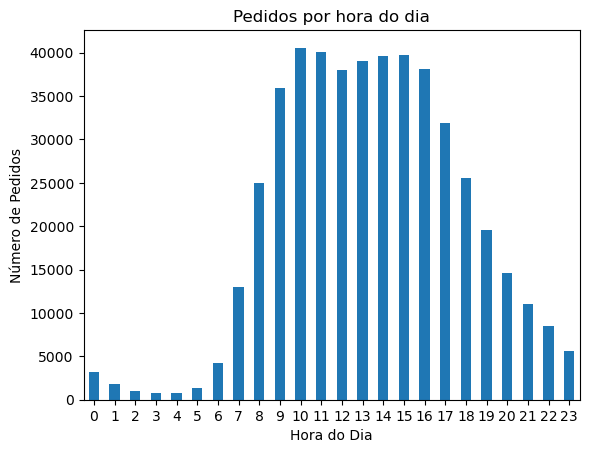

In [43]:
pedidos_por_dia = insta_orders_df['order_hour_of_day'].value_counts().sort_index()

pedidos_por_dia.plot(kind='bar')
plt.title('Pedidos por hora do dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=0)
plt.show()

Escreva suas conclusões aqui

<span style='color:red'> É possível observar com mais facilidade como os pedidos durante a madrugada são poucos se comparado ao horário de pico

### [A3] Em que dia da semana as pessoas compram produtos alimentícios?

<span style='color:red'> Acredito que essa pergunta esteja errada, ela é diferente do que esta escrito em cima (mas se fosse para responde-la, teria que ler os nomes do produto e pegar o departamento associado a alimentos, depois filtrar pegando apenas os produtos associados a este departamento para entao plotar em cima dele)

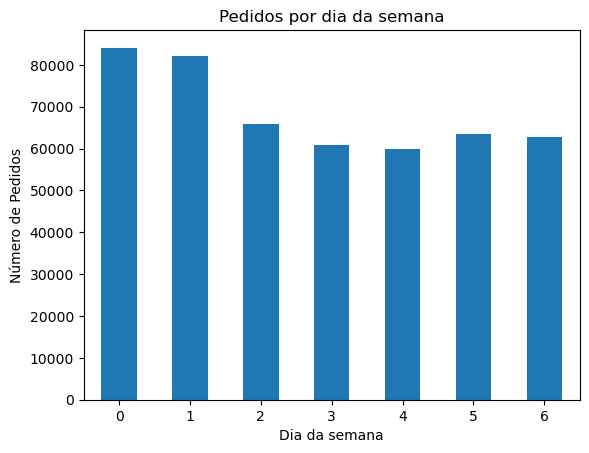

In [44]:
pedidos_por_dia_da_semana = insta_orders_df['order_dow'].value_counts().sort_index()

pedidos_por_dia_da_semana.plot(kind='bar')
plt.title('Pedidos por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=0)
plt.show()

Escreva suas conclusões aqui

<span style='color:red'> Novamente fica melhor visualizado que domingo é o dia que mais compras são feitas.

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

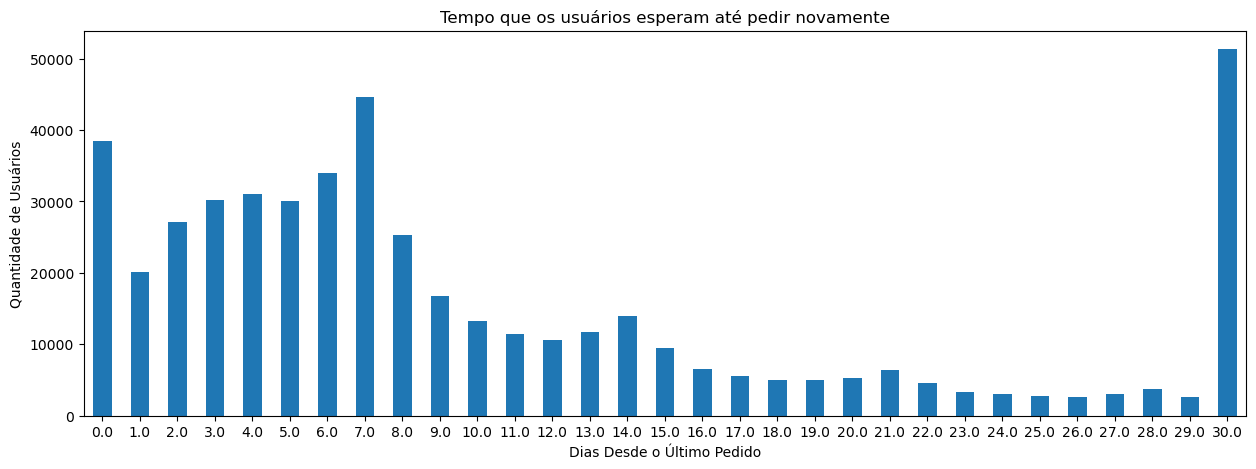

In [45]:
tempo_de_espera = insta_orders_df['days_since_prior_order'].value_counts().sort_index()
tempo_de_espera.plot(kind='bar', figsize=(15,5))
plt.title('Tempo que os usuários esperam até pedir novamente')
plt.xlabel('Dias Desde o Último Pedido')
plt.ylabel('Quantidade de Usuários')
plt.xticks(rotation=0)
plt.show()

Escreva suas conclusões aqui

<span style='color:red'> O valor mínimo de 0 está inflacionada pela troca de valores ausentes por zero e alem disso sempre que uma compra é feita , o usuário vai para o valor 0 então todos os usuários que compraram no dia anterior estão lá, e o valor máximo de 30 provavelmente é o máximo que a contagem vai, então todos os usuários que não compram a mais de um mês possuem 30 como valor nos dados.

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

In [46]:
quarta = insta_orders_df[insta_orders_df['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()
sabado = insta_orders_df[insta_orders_df['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()
comp = pd.DataFrame({'Quarta': quarta, 'Sábado': sabado})

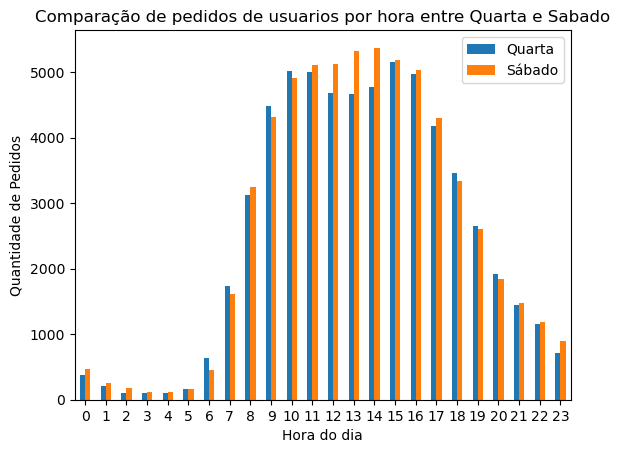

In [47]:
comp.plot(kind='bar')
plt.title('Comparação de pedidos de usuarios por hora entre Quarta e Sabado')
plt.xlabel('Hora do dia')
plt.ylabel('Quantidade de Pedidos')
plt.xticks(rotation=0)
plt.show()

Escreva suas conclusões aqui

<span style='color:red'> Ambos os dias apresentam o mesmo comportamento em relação ao horário do dia, com exceção com os horários entre 12h e 14h que sábado mantem um valor alto enquanto quarta diminui um pouco.

### [B2] Qual é a distribuição do número de pedidos por cliente?

In [48]:
data = insta_orders_df.groupby('user_id')['order_number'].count()

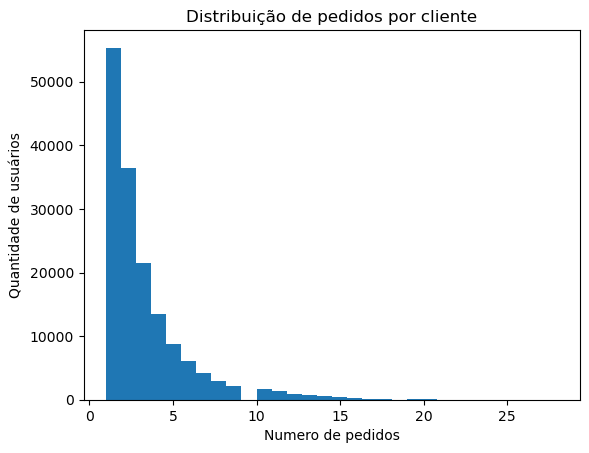

In [49]:
plt.hist(data, bins=30)
plt.title('Distribuição de pedidos por cliente')
plt.xlabel('Numero de pedidos')
plt.ylabel('Quantidade de usuários')
plt.show()

Escreva suas conclusões aqui

<span style='color:red'> Uma grande parte dos clientes fez poucos pedidos estando a maioria entre 1 e 2.

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [50]:
products_20 = order_products_df['product_id'].value_counts().head(20).reset_index()
products_20.columns = ['product_id', 'quantidade']
pd.merge(products_20['product_id'], products_df[['product_name', 'product_id']], on='product_id')

,product_id,product_name
0,24852,banana
1,13176,bag of organic bananas
2,21137,organic strawberries
3,21903,organic baby spinach
4,47209,organic hass avocado
5,47766,organic avocado
6,47626,large lemon
7,16797,strawberries
8,26209,limes
9,27845,organic whole milk


Escreva suas conclusões aqui

<span style='color:red'> Primeiramente foi criado um novo dataframe com apenas os 20 produtos mais vendidos, então com um merge usando o padrão de innerjoin foi possível pegar apenas os 20 nomes associados aos product ids filtrados.

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [51]:
# contar quantos products_ids estão associados a um único order_id -> fazer a media
data = order_products_df.groupby('order_id')['product_id'].count()
media = data.mean()
media

10.097281166814058

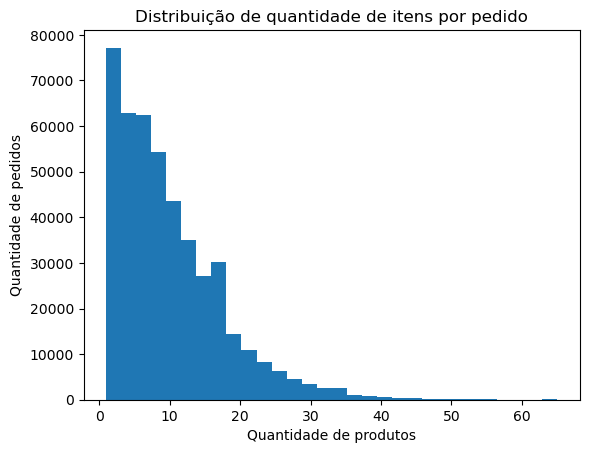

In [52]:
plt.hist(data, bins=30)
plt.title('Distribuição de quantidade de itens por pedido')
plt.xlabel('Quantidade de produtos')
plt.ylabel('Quantidade de pedidos')
plt.show()

Escreva suas conclusões aqui

<span style='color:red'> Em média as pessoas normalmente pedem 10 produtos por pedido, o gráfico já mostra uma distribuição bem centralizada entre 1 e 15.

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [60]:
#Para cada produto verificar a media do cart_order e pegar as medias mais baixas ou pegar os que aparecem mais na posição 1???

In [61]:
#Solução 1
order_count = order_products_df['order_id'].value_counts()
index = order_count[order_count > 1].index
filtro = order_products_df[order_products_df['order_id'].isin(index)]
filtro.groupby('product_id')['add_to_cart_order'].mean().sort_values(ascending=True).head(20)

product_id
38103    1.0
41850    1.0
23597    1.0
10820    1.0
30378    1.0
14517    1.0
41906    1.0
23589    1.0
35557    1.0
3760     1.0
5894     1.0
46340    1.0
41945    1.0
5880     1.0
10930    1.0
10958    1.0
5066     1.0
23578    1.0
23568    1.0
19329    1.0
Name: add_to_cart_order, dtype: float64

In [62]:
#Solução 2
primeiro = filtro[filtro['add_to_cart_order'] == 1]
primeiro['product_id'].value_counts().head(20)

product_id
24852    15240
13176    10635
27845     4224
21137     3775
47209     3307
21903     3193
47766     2981
16797     2138
19660     2051
27966     1982
44632     1854
47626     1680
49235     1667
38689     1372
26209     1335
196       1332
5785      1287
27086     1272
22935     1210
12341     1192
Name: count, dtype: int64

Escreva suas conclusões aqui

<span style='color:red'> Soluçao 1: Eu interpretei que era para pegar os pedidos com mais de 1 item e ai verificar de todos os produtos qual deles tinham a menor média. Solução 2: Deva vez são os produtos que mais aparecem na posição 1